# **Assignment #1**
### **NumtaDB: Bengali Handwritten Digits Classification using Neural Network**

###**Introduction:-**

Optical Character Recognition (OCR) is one of the major topics of Natural Language Processing (NLP). A widespread use of Deep Learning can be obsereved in the field of OCR. Neural Networks are computation models inspired from human brains. Training deep Neural Networks is called Deep Learning which is a subset of supervised Machine Learning.

In this experiment, different Neural Network models with different hyperparameter settings to classify 0-9 handwritten digits of NumtaDB dataset are trained. After the training phase the best model is tested with test data which is split from the whole dataset. Finally, all models are thoroughly compared based on their hyperparameter configurations.

###**Dataset:-**

NumtaDB is a large dataset consisted of 85,000+ Bengali handwritten digits images. It is a combination of datasets from six different sources. The dataset is divided into different training and test subsets.

*Dataset Link:* https://www.kaggle.com/BengaliAI/numta/

*Snapshot from NumtaDB:*

<div align="center">
<img src="https://drive.google.com/uc?id=1LvkNwV1My2RniR_JsbasBET1fa97eMQu" width="500">
</div>

###**Logistic Regression & Neural Network:-**

Logistic regression is a supervised learning algorithm which tries to minimize the error between training data and the predictions.

Logistic regression passes the output of linear regression to  sigmoid function. Here $\beta$ and $b$ are parameters named weight vector and bias respectively. These parameters get updated till the cost function is minimized through gradient descent optimization algorithm.

The prediction $h_\beta (x_i)$ ranges between 0 to 1 inclusive. If $x$ represents training features,

$h_\beta(x) = \sigma(\beta^T x + b)$

Equation of the Sigmoid function is,

$\sigma(z) = \frac{1}{1 + \exp^{-z}}$

Equation for the Cross Entropy cost function is, 

$J(\beta ) = \frac{1}{m} \sum_{i=1}^m[-y_i log(h_\beta (x_i) – (1 – y_i) log(1-h_\beta (x_i))]$

Using Cross Entropy with Sigmoid output, the resultant function becomes convex which is elligible for gradient descent convergence.

So parameter updation executed until the following condition is fulfilled,

$\frac{dJ(\beta)}{d\beta} = \frac{1}{m} \sum_{i=1}^Nx_i(h_\beta(x_i)-y_i) = 0$

Here, $m$ is the size of the training set.

Gradient descent weight updation equation is written below,

$\beta := \beta - \alpha \frac{dJ(\beta)}{d\beta}$

Here, $\alpha$ is the learning rate indicating how fast or slow the optimizer will try to converge.

Neural Network is basically a stack of units that perform logistic regression and passes the output to the next layers. These outputs are the output of activation functions.  

There are at least one input, one hidden (fully connected) and one output layer in a Neural Network. The internal layers are called hidden layers because the true values of those layers for the training set can't be observed.

Simple Neural Network structure is shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1_U5ywB15itLi_EoH28OvsrUJJKqPYxht" width="200">
</div>

<div align="center">
<img src="https://drive.google.com/uc?id=1jDgBL0GmghhB0P8ljOzfw92FGafYopUX" width="800">
</div>

Here superscripts represent the layer numbers.

Activations functions can be linear or non-linear. Linear functions are not elligible for backpropagation and linear operation of a collection of layers or neurons produces a linear decision boundary. This is similar to linear regression.

For generating complex non-linear decision boundary, non-linear activations are used. They have non-zero derivatives which makes backpropagation possible.

Equations for multiple logistic regression units are converted to a vectorized equation for backpropagation.

###**Hyperparameters:-**

Hyperparameters are elements which influence the parameters but do not get updated during training. Some significant hyperparameters in this experiment are:

*    **Batch Size/ Minibatch:** Number of examples in one iteration.
*    **Number of Iteration:** One iteration represents one mini-batch forward & backward pass. That means a parameter (weights and biases) update.
*    **Optimizer:** The parameter updation is executed during backpropagation with the help of gradient descent optimizer by calculating partial derivatives of the cost function with respect to current weight. Parameters are updated only in the training phase of the model. The goal of the optimizer is to converge or to reach the global maxima of the loss
function. Notable optimizers which are successor of gradient descent are Stochastic Gradient Descent (SGD), SGD+Momentum, Adagrad, Adadelta, RMSProp, Adam etc. Adam has an adaptive learning rate and doesn’t have the issues faced when using SGD.

    Different optimizers performance comparison is shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1fjsoFvvBRChEEyNY2jp47_aSQ8eoHrWN" width="300">
</div>

*    **Learning Rate:** The learning rate is a constant indicating how fast or slow the optimizer will be updating the parameters. If it is too small then it will not be efficient for the optimizer to converge. If it is large then the optimizer may diverge which means, never reaching the global maxima.
*    **Loss Function:** Also known as criterion function. The derivative of this function is used in parameter updation equation. This derivative is zero in the global optima. Loss function computes the error for a single training example. Cross Entropy, Mean Square Error etc are notable loss functions.
*    **Epoch:** One epoch means running through the whole dataset once
$epochs = iterations \div \frac{totaldata}{minibatch}$  
*    **Number of Layers:** A Neural Network can have multiple layers. It must have a single layer and input layer is not considered. More layers create better feature learning capability.
*    **Number of Neurons:** A single layer is consisted of many neurons. More neurons usually result in better performance.
*    **Activation Funtion:**  Activation function activates or deactivates hidden layer neurons of neural network according to a threshold. 
Sigmoid, Tanh, ReLU, LeakyReLU etc are notable non-linear activation functions. Sigmoid and Tanh are saturating activations because for too small or large input values the gradient is close to zero. Using these activations in deep networks result in vanishing gradient problem which means the weights and biases don't get updated. For negative inputs the gradient of ReLU becomes zero. This problem is named dying ReLU. LeakyReLU is created to resolve this problem. Its equation is $max(0.1x,x)$. Different activation functions can be used in different layers in a Neural Network. Equations and graphs for different activations are shown below:

<div align="center">
<img src="https://drive.google.com/uc?id=1friUQG7FVmnYOf7fde8H1Mp1IftxGMHm" width="250">
</div>

###**Experimental Setup:-**

**Preprocessing:-**

There are total 54908 images in the A,C,D folders of NumtaDB training dataset. For this experiment, this dataset was split into 90% for training and 10% for test set. Images were normalized using mean and standard deviation of 0.5 . All images were resized to 28x28 pixels. The input dimension is 28x28 and there are 10 units for the (0-9) 10 classes as output layer. The images have only one channel.

**Configuration Summary:-**

According to the discussion in the optimizer part of the hyperparameter section, initially I prefered trying out the Adam optimizer. 

Though learning rate values in 0.001 to 0.00001 range were tested in most of the settings, models with 0.0001 learning rate achieved the best accuracy and loss.

The best configurations have batch size of either 300 or 512 for number of iterations set between 9000 to 21000 range. Too large batch sizes were not selected to keep the training duration as low as possible for each setting. Increasing the batch size till 512 undoubtedly helped gain better accuracy for respective combinations.

Tuning number of layers is a crucial part of neural network training. A single layer neural network is far more efficient than logistic regression with a single neuron.

Increasing number of layers enhance the feature learning capability of the neural network. But adding too many layers result in overfitting which means model can generalize well on training data but fits the validation data poorly. Basically oveerfitting is caused by too much complex non-linear decision boundary. There are many techniques to avoid overfitting such as regularization but those are not a priority in this  experiment.

Number of layers ranging between two to five was chosen for different models. It was observed that most of the deep models with five or more hidden layers started showing overfitting. So, too deep models weren't attempted in this experiment. The best 4 models for this dataset have 3-4 layers.

For the layers, number of hidden units or neurons was chosen randomly in monotonically increasing or decreasing or non-monotonic sequence. 100 to 2048 neurons were selected for each layer. I tried with neuron amount of power of 2 such as 512, 2048 etc in a few configurations but didn't bother much about this because there is no hard and fast rule regarding this. 

Neural networks can be trained with different activations in different layers. Tanh, ReLU, Sigmoid, LeakyReLU and some other activations from the pytorch libraries were used with the layers but Tanh and LeakyReLU combinations are predominant in the best 4 models. 

Categorical Cross Entropy Loss function has been chosen for all the settings as the task is a multiclass classificaion. There are other loss functions which could be tested but in this specific problem domain, using Cross Entropy loss is mostly preferred.

The hyperparameter configurations of different models are shown in the table below:

|Config No.| Num of Iteration| Batch Size|Optimizer|Learning Rate|Num of Layers|Num of Neurons|Activation Function|
|:------| :-------: | :-------: |:-----:|:-----:|:-----:|:-----:|-----:|
| 1| 9000  | 300 | Adam | 0.0001 | 3 |300,500,700 | Tanh,LeakyReLU,LeakyReLU|
| 2| 9000 | 300| Adam |  0.0001  | 3 |1024,512,300| LeakyReLU,Tanh,LeakyReLU|
| 3| 9000 | 300 | Adam |  0.0001 | 3 |600,600,600| Tanh,LeakyReLU,LeakyReLU|
| 4| 21000 | 512 | Adam | 0.0001 | 4 |2048,2048,2048,2048| Tanh,LeakyReLU,LeakyReLU,LeakyReLU|



###**Result Analysis:-**

**Model Performance:-**

Table for the performance of the settings with Categorical Cross Entropy Loss is shown below:

|Config No.| Num of Iteration| Batch Size|Optimizer|Learning Rate|Num of Layers|Num of Neurons|Activation Function| Accuracy| Loss|
|:------| :-------: | :--------: |:-----:|:----:|:----:|:----:|:----:|:----:|----:|
| 1| 9000  | 300 |  Adam | 0.0001 |3 |300,500,700  |Tanh,LeakyReLU,LeakyReLU | 78.54 | 0.499 | 
| 2| 9000 | 300| Adam |  0.0001   |3 |1024,512,300 | LeakyReLU,Tanh,LeakyReLU| 76.76 | 0.58 | 
| 3| 9000 | 300 | Adam |   0.0001 |3 |600,600,600|  Tanh,LeakyReLU,LeakyReLU | 82.28| 0.46 | 
| 4| 21000 | 512 | Adam |  0.0001 |4 |2048,2048,2048,2048| Tanh,LeakyReLU,LeakyReLU,LeakyReLU | 94.32 | 1.44e-05| 


From the above tables it can be observed that, configuration-3 and configuration-4 are the best performing models for 9000 and 21000 iterations respectively. Configuration-4 is the extension of batch size, iteration amount and number of layers and neurons of the best hyperparameter setting with lower number of iterations.

Performance based on hyperparameter choice for this dataset are discussed below:

Among all settings with three layers, Adam optimizer with 0.0001 learning rate and batch size of 300 or above outperformed all other choices which couldn't make the model reach 70 or higher accuracy in 9000 iterations. So those hyperparameter choices weren't applied on deeper models. Yet, it was observed that 0.00001 learning rate has more potential to converge better given longer training time. SGD+momentum can also bring decent outcomes with a huge iteration amount.

Batch size deeply impacted model performance. Both accuracy and loss improved a lot for using bigger batch sizes. For all the settings, there is no record of achieving 70 or more accuracy with batch size lower than 300.

Settings with 0.1,0.001 and 0.00001 learning rate gained worse accuracy compared to 0.0001 if other hyperparameters were kept constant.

Increasing number of iterations helped the best model achieve even better accuracy. Model-4 reached above 80 accuracy in its second iteration. So it definitely has the most optimal hyperparameters. But the loss curve of this model was stuck in many local maxima during the phase of 4500 up iterations.
At this phase, the accuracy oscillated between 90 to 92 range. So the strongest hyperparameter setting in this experiment took 11000+ iterations to reach from 92 to 94 accuracy. Though the first three models have a fixed number of iterations of 9000, their performance can be compared well. Therefore, iteration amount of 9000 is enough to benchmark different settings and around 21000 is ideal to push the best stting to its highest limit.

All the best models are consisted of Tanh and LeakyReLU activation but their order in layers obviously matters. Tanh-LeakyReLU-LeakyReLU performs better than LeakyReLU-Tanh-LeakyReLU combination. In the experiments it was noticed that, replacing Tanh with Sigmoid even in a single layer decreased accuracy by a large margin. ReLU-LeakyReLU,ReLU-Tanh,ReLU-ReLU,Tanh-Tanh combinations could not make it close to the best performing models. But the most surprising fact is, using LeakyReLU in all the layers could not beat the best four models with Tanh-LeakyReLU combination in terms of both accuracy and loss. From the behaviour of the models, the existence of issues like the dying ReLU and saturating Sigmoid and Tanh are noticed.

Three and four layer models showed identical performance in case of suboptimal hyperparameter choices for four layers. But all these models outperformed the two layer ones. Still, there is no clear pattern in this case. From different settings it can be noticed that number of layers alone can not indicate model efficiency. Number of neurons is also to be taken to consideration. So, we analyze these two hyperparameter choices together.

Firstly, settings with more layers with too few neurons lag behind less layer settings. If we take layers with 50,50,100,100 neurons, the model would perform worse than 300,200,200 model.

If number of layers is kept constant, then different monotonic or non-monotonic orders of fixed neuron amount for each layer does not influence model efficiency too much. Example: 300,500,400 and 300,400,500 don't have significant difference in accuracy and loss. But in the table, 1024,512,300 (model-2) lags behind 300,500,700 (model-1) in accuracy and loss. From the performance based on combination of activations, it can be concluded that this exception happened because model-2 uses a suboptimal combination LeakyReLU-Tanh-LeakyReLU.

The highest number of neurons among all the layers do not impact performance as much as the lowest number of neurons among all the layers. If the lowest number is too low then the model performs poorly compared to the model which doesn't have too high number of neurons in any layer but has more neurons as its lowest number of neurons. 1024,512,300 (model-2) lags behind 600,600,600 (model-3) in performance.

If the lowest number of neurons is constant, then more neurons added to highest number of neurons layer boosts performance. For instance, 300,700,500 shows better efficiency compared to 300,500,400.

So, it's not as much plain and simple as the idea that the number of neurons of all layers added indicate the performance of a neural network.

The four best models are compared below with respective loss curves:

<div align="center">
<img src="https://drive.google.com/uc?id=1D2xvraSv94uUKueAsdmisVDbSHzcRcwE" width="800">
</div>

Config-2 is the steepest among the four loss curves which means the loss is decreasing faster than the other three curves. Settings 1,2,3 are with 9000 iterations whereas 4 has 21000 iterations. Setting 4 has the noisiest curve which indicates that the loss oscillates too much. From 2500 to around 15000 iterations in Config-4, the noisiest region is located. After 15000 iterations, the curve becomes parallel to x-axis. This means that the loss doesn't decrease anymore. Among Config 1,2 and 3, Config-3 has the lowest lost in the end. Config-4 has a final loss of 1.44e-05 which is far below 0. The other three configurations have above 0.4 loss.

It should be mentioned that the consequence of stacking consecutive Tanh or Sigmoid activation layers is the vanishing gradient problem. Such setting in case of ReLU results in the dying ReLU problem. To avoid these, the activation combinations were chosen cautiously and as a result, the models showed satisfactory accuracy.

**Test set prediction:-**

Setting-4 could correctly predict 5 out of 5 given samples of the test set. This code is just below the code of Setting-4 loss graph plot.

###**Conclusion:-**

In this experiment, I have built and compared different hyperparameter tuned models of Neural Network to classifiy digits of 0 to 9 classes of the NumtaDB dataset. The cause of building Configuration-4 was to push the accuracy as much as possible for this dataset. Though 2048 number of neurons in 4 layers may seem redundant, with a big batch size of 512, the model showed remarkable performance with 94.32 accuracy and 1.44e-05 loss which indicates that there was not much overfitting. In the experiment it was observed that a specific combination of Tanh and LeakyReLU yielded to the best results. Hence, it is proved that the zero gradient problems of Sigmoid and dying ReLU problem of ReLU hampers accuracy and to avoid this, the activation combination of Config-4 was very effective. Therefore, it can be concluded that the intuition related to Neural Network batch size, layer amount, activation and neuron amount per layer was fruitful.










In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import os
from os import path
import shutil
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets, transforms, models
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
!unzip '/content/gdrive/MyDrive/numtaDB.zip'

Streaming output truncated to the last 5000 lines.
  inflating: training-e/e11778.png   
  inflating: training-e/e11779.png   
  inflating: training-e/e11780.png   
  inflating: training-e/e11781.png   
  inflating: training-e/e11782.png   
  inflating: training-e/e11783.png   
  inflating: training-e/e11784.png   
  inflating: training-e/e11785.png   
  inflating: training-e/e11786.png   
  inflating: training-e/e11787.png   
  inflating: training-e/e11788.png   
  inflating: training-e/e11789.png   
  inflating: training-e/e11790.png   
  inflating: training-e/e11791.png   
  inflating: training-e/e11792.png   
  inflating: training-e/e11793.png   
  inflating: training-e/e11794.png   
  inflating: training-e/e11795.png   
  inflating: training-e/e11796.png   
  inflating: training-e/e11797.png   
  inflating: training-e/e11798.png   
  inflating: training-e/e11799.png   
  inflating: training-e/e11800.png   
  inflating: training-e/e11801.png   
  inflating: training-e/e11802.png   

In [ ]:
PATH = '../content/'
os.listdir(PATH)

['.config',
 'testing-a',
 'gdrive',
 'training-a.csv',
 'testing-d',
 'testing-b',
 'training-d',
 'training-c',
 'testing-all-corrected',
 'testing-e',
 'training-c.csv',
 'testing-f',
 'testing-auga',
 'training-d.csv',
 'training-e',
 'training-b',
 'training-a',
 'training-b.csv',
 'training-e.csv',
 'testing-c',
 'testing-augc',
 'sample_data']

In [ ]:
def showRawTrainingSamples(csv_filename):
  df = pd.read_csv(PATH + csv_filename)
  print(csv_filename)
  print(df.columns)
  return df

In [ ]:
a_csv = showRawTrainingSamples('/training-a.csv')
#b_csv = showRawTrainingSamples('/training-b.csv')
c_csv = showRawTrainingSamples('/training-c.csv')
d_csv = showRawTrainingSamples('/training-d.csv')
#e_csv = showRawTrainingSamples('/training-e.csv')

/training-a.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
/training-c.csv
Index(['filename', 'original filename', 'scanid', 'digit',
       'database name original', 'contributing team', 'database name'],
      dtype='object')
/training-d.csv
Index(['original filename', 'scanid', 'digit', 'num', 'database name original',
       'database name', 'filename'],
      dtype='object')


In [ ]:
def dropColumns(csv_file):
  csv_file = csv_file[['filename', 'digit']]
  print(csv_file)
  print(csv_file.iloc[:5, :])   #First 5 Rows of the CSV File
  print("=============================")
  return csv_file

In [ ]:
a_csv = dropColumns(a_csv)
#b_csv = dropColumns(b_csv)
c_csv = dropColumns(c_csv)
d_csv = dropColumns(d_csv)
#e_csv = dropColumns(e_csv)

         filename  digit
0      a00000.png      5
1      a00001.png      3
2      a00002.png      1
3      a00003.png      7
4      a00004.png      0
...           ...    ...
19697  a19697.png      4
19698  a19698.png      3
19699  a19699.png      8
19700  a19700.png      3
19701  a19701.png      8

[19702 rows x 2 columns]
     filename  digit
0  a00000.png      5
1  a00001.png      3
2  a00002.png      1
3  a00003.png      7
4  a00004.png      0
         filename  digit
0      c00000.png      6
1      c00001.png      1
2      c00002.png      3
3      c00003.png      2
4      c00004.png      7
...           ...    ...
24293  c24293.png      3
24294  c24294.png      2
24295  c24295.png      7
24296  c24296.png      2
24297  c24297.png      7

[24298 rows x 2 columns]
     filename  digit
0  c00000.png      6
1  c00001.png      1
2  c00002.png      3
3  c00003.png      2
4  c00004.png      7
         filename  digit
0      d00000.png      1
1      d00001.png      1
2      d00002.png    

In [ ]:
#total_csv = [a_csv,b_csv, c_csv, d_csv,e_csv]
total_csv = [a_csv, c_csv, d_csv]
merged_csv = pd.concat(total_csv)
print(len(merged_csv))

54908


In [ ]:
TRAIN_PATH = 'training'
os.mkdir(TRAIN_PATH)

In [ ]:
def processImages(folder_name):
  src = PATH + folder_name + '/'
  dir_folders = os.listdir(src)
  for dir_name in dir_folders:
    file_name = os.path.join(src, dir_name)
    if os.path.isfile(file_name):
      shutil.copy(file_name, TRAIN_PATH)  

In [ ]:
processImages('/training-a')
print('A Done')
# processImages('/training-b')
# print('B Done')
processImages('/training-c')
print('C Done')
processImages('/training-d')
print('D Done')
# processImages('/training-e')
# print('E Done')

A Done
C Done
D Done


In [ ]:
class Dataset(Dataset):
    def __init__(self, df, root, transform=None):
        self.data = df
        self.root = root
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        item = self.data.iloc[index]
        
        path = self.root + "/" + item[0]
        image = Image.open(path).convert('L')
        label = item[1]
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
mean = [0.5,]
std = [0.5, ]

train_transform = transforms.Compose([
    transforms.Resize(28),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transform = transforms.Compose([
        transforms.Resize(28),
        transforms.ToTensor(),
        transforms.Normalize(mean, std)
])

train_data  = Dataset(merged_csv, TRAIN_PATH, train_transform)
test_data = Dataset(merged_csv, TRAIN_PATH, test_transform)

print("Trainig Samples: ",len(train_data))

Trainig Samples:  54908


In [ ]:
#batch size
batch_size = 512

# split data 10% for testing
test_size = 0.1

# obtain training indices that will be used for validation
num_train = len(train_data)

# mix data
# index of num of train
indices = list(range(num_train))
# random the index
np.random.shuffle(indices)
split = int(np.floor(test_size * num_train))
# divied into two part
train_idx, test_idx = indices[split:], indices[:split]

# define the sampler
train_sampler = SubsetRandomSampler(train_idx)
test_sampler = SubsetRandomSampler(test_idx)

# prepare loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size,
    sampler=train_sampler)

test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size,
    sampler=test_sampler)

print("Train dataloader:{}".format(len(train_loader)))
print("Test dataloader:{}".format(len(test_loader)))

Train dataloader:97
Test dataloader:11


CONFIGURATION-1

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 300
num_iters = 9000
input_dim = 28*28 #num_features = 784
num_hidden1 = 300
num_hidden2 = 500
num_hidden3 = 700
# num_hidden4 = 1024
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden3, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8438680171966553. Accuracy: 39.50819672131148
Iteration: 1000. Loss: 1.4315344095230103. Accuracy: 52.295081967213115
Iteration: 1500. Loss: 1.1342835426330566. Accuracy: 59.380692167577415
Iteration: 2000. Loss: 1.063986897468567. Accuracy: 63.29690346083789
Iteration: 2500. Loss: 1.0172014236450195. Accuracy: 66.99453551912568
Iteration: 3000. Loss: 0.7856471538543701. Accuracy: 67.44990892531877
Iteration: 3500. Loss: 0.8064234256744385. Accuracy: 71.87613843351548
Iteration: 4000. Loss: 0.8361008763313293. Accuracy: 74.73588342440802
Iteration: 4500. Loss: 0.8485416173934937. Accuracy: 72.87795992714025
Iteration: 5000. Loss: 0.6182949542999268. Accuracy: 76.3023679417122
Iteration: 5500. Loss: 0.6611819863319397. Accuracy: 74.80874316939891
Iteration: 6000. Loss: 0.5598077178001404. Accuracy: 74.49908925318762
Iteration: 6500. Loss: 0.4969775974750519. Accuracy: 78.79781420765028
Iteration: 7000. Loss: 0.5178949236869812. Accuracy: 78.88888888888889
Iterati

[1.8438680171966553, 1.4315344095230103, 1.1342835426330566, 1.063986897468567, 1.0172014236450195, 0.7856471538543701, 0.8064234256744385, 0.8361008763313293, 0.8485416173934937, 0.6182949542999268, 0.6611819863319397, 0.5598077178001404, 0.4969775974750519, 0.5178949236869812, 0.4726042151451111, 0.49905073642730713]


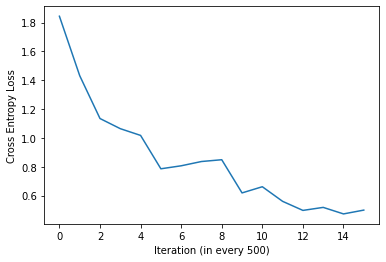

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

CONFIGURATION-2

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 300
num_iters = 9000
input_dim = 28*28 #num_features = 784
num_hidden1 = 1024
num_hidden2 = 512
num_hidden3 = 300
# num_hidden4 = 1024
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.LeakyReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.Tanh()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden3, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7290183305740356. Accuracy: 40.29143897996357
Iteration: 1000. Loss: 1.5891399383544922. Accuracy: 46.247723132969035
Iteration: 1500. Loss: 1.3620368242263794. Accuracy: 50.728597449908925
Iteration: 2000. Loss: 1.2448844909667969. Accuracy: 56.79417122040073
Iteration: 2500. Loss: 1.1902556419372559. Accuracy: 61.85792349726776
Iteration: 3000. Loss: 1.0046888589859009. Accuracy: 61.967213114754095
Iteration: 3500. Loss: 0.9933068752288818. Accuracy: 68.90710382513662
Iteration: 4000. Loss: 0.9561027884483337. Accuracy: 70.60109289617486
Iteration: 4500. Loss: 0.8774269819259644. Accuracy: 70.60109289617486
Iteration: 5000. Loss: 0.7761059999465942. Accuracy: 73.78870673952642
Iteration: 5500. Loss: 0.7848055362701416. Accuracy: 73.42440801457195
Iteration: 6000. Loss: 0.715887725353241. Accuracy: 73.18761384335154
Iteration: 6500. Loss: 0.6768909096717834. Accuracy: 76.66666666666667
Iteration: 7000. Loss: 0.6508083939552307. Accuracy: 76.46630236794171
Itera

[1.7290183305740356, 1.5891399383544922, 1.3620368242263794, 1.2448844909667969, 1.1902556419372559, 1.0046888589859009, 0.9933068752288818, 0.9561027884483337, 0.8774269819259644, 0.7761059999465942, 0.7848055362701416, 0.715887725353241, 0.6768909096717834, 0.6508083939552307, 0.5828347206115723, 0.5751835107803345]


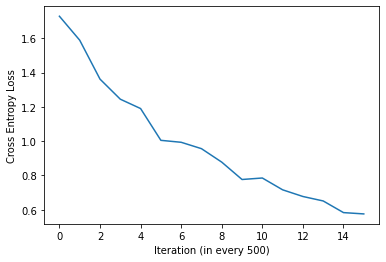

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

CONFIGURATION-3

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 300
num_iters = 9000
input_dim = 28*28 #num_features = 784
num_hidden1 = 600
num_hidden2 = 600
num_hidden3 = 600
# num_hidden4 = 1024
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        # ### 3rd hidden layer: 100 --> 100
        # self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        # ### Non-linearity in 3rd hidden layer
        # self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden3, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        # ### 4th hidden layer
        # out  = self.linear_4(out)
        # ### Non-linearity in 3rd hidden layer
        # out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.7784340381622314. Accuracy: 43.36976320582878
Iteration: 1000. Loss: 1.3515872955322266. Accuracy: 55.22768670309654
Iteration: 1500. Loss: 1.1362102031707764. Accuracy: 62.568306010928964
Iteration: 2000. Loss: 0.9209760427474976. Accuracy: 68.3424408014572
Iteration: 2500. Loss: 0.9125763773918152. Accuracy: 72.65938069216757
Iteration: 3000. Loss: 0.6680630445480347. Accuracy: 71.94899817850637
Iteration: 3500. Loss: 0.8144241571426392. Accuracy: 74.8816029143898
Iteration: 4000. Loss: 0.6885290145874023. Accuracy: 76.10200364298726
Iteration: 4500. Loss: 0.6983428001403809. Accuracy: 76.22950819672131
Iteration: 5000. Loss: 0.6070656180381775. Accuracy: 79.48998178506375
Iteration: 5500. Loss: 0.4743167757987976. Accuracy: 80.91074681238615
Iteration: 6000. Loss: 0.6128928065299988. Accuracy: 80.5464480874317
Iteration: 6500. Loss: 0.4910842478275299. Accuracy: 82.07650273224044
Iteration: 7000. Loss: 0.49358928203582764. Accuracy: 82.64116575591986
Iteratio

[1.7784340381622314, 1.3515872955322266, 1.1362102031707764, 0.9209760427474976, 0.9125763773918152, 0.6680630445480347, 0.8144241571426392, 0.6885290145874023, 0.6983428001403809, 0.6070656180381775, 0.4743167757987976, 0.6128928065299988, 0.4910842478275299, 0.49358928203582764, 0.5295875072479248, 0.44526731967926025]


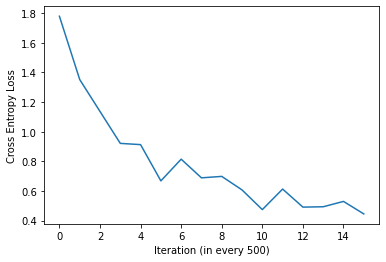

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

CONFIGURATION-4

In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

# Hyperparameters
batch_size = 512
num_iters = 21000
input_dim = 28*28 #num_features = 784
num_hidden1 = 2048
num_hidden2 = 2048
num_hidden3 = 2048
num_hidden4 = 2048
output_dim = 10

learning_rate = 0.0001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


num_epochs = num_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)


class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden1)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.Tanh()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden1, num_hidden2)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.LeakyReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden2, num_hidden3)
        ### Non-linearity in 3rd hidden layer
        self.relu_3 = nn.LeakyReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden3, num_hidden4)
        ### Non-linearity in 3rd hidden layer
        self.relu_4 = nn.LeakyReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden4, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)

        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_3(out)

        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 3rd hidden layer
        out = self.relu_4(out)
        
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas

# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

iteration_loss=[]
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 0.7134665250778198. Accuracy: 72.29508196721312
Iteration: 1000. Loss: 0.4037288427352905. Accuracy: 84.15300546448087
Iteration: 1500. Loss: 0.21737541258335114. Accuracy: 86.64845173041894
Iteration: 2000. Loss: 0.22627459466457367. Accuracy: 86.57559198542805
Iteration: 2500. Loss: 0.11140378564596176. Accuracy: 89.9271402550091
Iteration: 3000. Loss: 0.1574047952890396. Accuracy: 89.38069216757741
Iteration: 3500. Loss: 0.10504280775785446. Accuracy: 88.37887067395265
Iteration: 4000. Loss: 0.07450681179761887. Accuracy: 89.59927140255009
Iteration: 4500. Loss: 0.0447760634124279. Accuracy: 90.43715846994536
Iteration: 5000. Loss: 0.111699678003788. Accuracy: 90.76502732240438
Iteration: 5500. Loss: 0.0650552362203598. Accuracy: 91.63934426229508
Iteration: 6000. Loss: 0.07198551297187805. Accuracy: 90.40072859744991
Iteration: 6500. Loss: 0.05103003606200218. Accuracy: 90.34608378870674
Iteration: 7000. Loss: 0.03596263751387596. Accuracy: 91.07468123861567
I

[0.7134665250778198, 0.4037288427352905, 0.21737541258335114, 0.22627459466457367, 0.11140378564596176, 0.1574047952890396, 0.10504280775785446, 0.07450681179761887, 0.0447760634124279, 0.111699678003788, 0.0650552362203598, 0.07198551297187805, 0.05103003606200218, 0.03596263751387596, 0.08139180392026901, 0.01144080888479948, 0.0612555555999279, 0.034825000911951065, 0.01749207079410553, 0.016166776418685913, 0.04479259252548218, 0.004705047234892845, 0.03483274206519127, 0.024250132963061333, 0.014774851500988007, 0.032673247158527374, 0.03336719423532486, 0.009915517643094063, 0.0011062800185754895, 5.4443502449430525e-05, 3.160824053338729e-05, 3.7360510759754106e-05, 2.2083318981458433e-05, 2.0395607862155885e-05, 1.2548768609121908e-05, 1.5576644727843814e-05, 1.4359151464304887e-05]


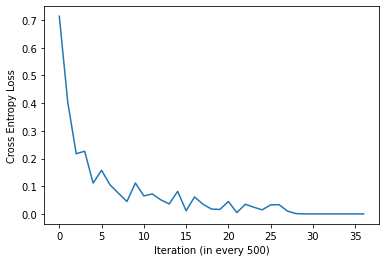

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

CONFIG-4 PREDICTION ON TEST DATA

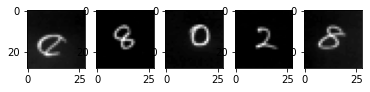

In [ ]:
for images, labels in test_loader:
    break
    
fig, ax = plt.subplots(1, 5)
for i in range(5):
    ax[i].imshow(images[i].view(28, 28), cmap=matplotlib.cm.binary)

plt.show()

In [ ]:
predictions = model.forward(images[:5].view(-1, 28*28).to(device))
predictions = torch.argmax(predictions, dim=1)
print('Predicted labels', predictions.cpu().numpy())

Predicted labels [5 4 0 2 4]
